In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import datetime
import matplotlib.pyplot as plt
from numpy import sqrt
from numpy import log

<ipython-input-1-9a726db43e3e>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


**Upsampling Data**

In [2]:
series =pd.read_csv('/sales.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
series.head()

Month
1990-01-01    266.0
1990-02-01    145.9
1990-03-01    183.1
1990-04-01    119.3
1990-05-01    180.3
Name: Sales, dtype: float64

**Daily Intervals**

In [3]:
upsampled = series.resample('D').mean()
pd.DataFrame(upsampled.head(32))

,Sales
Month,
1990-01-01,266.0
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
1990-01-06,NaN
1990-01-07,NaN
1990-01-08,NaN
1990-01-09,NaN


**Interpolate the missing value**

In [4]:
interpolated = upsampled.interpolate(method='linear')
pd.DataFrame(interpolated.head(32))

,Sales
Month,
1990-01-01,266.000000
1990-01-02,262.125806
1990-01-03,258.251613
1990-01-04,254.377419
1990-01-05,250.503226
1990-01-06,246.629032
1990-01-07,242.754839
1990-01-08,238.880645
1990-01-09,235.006452


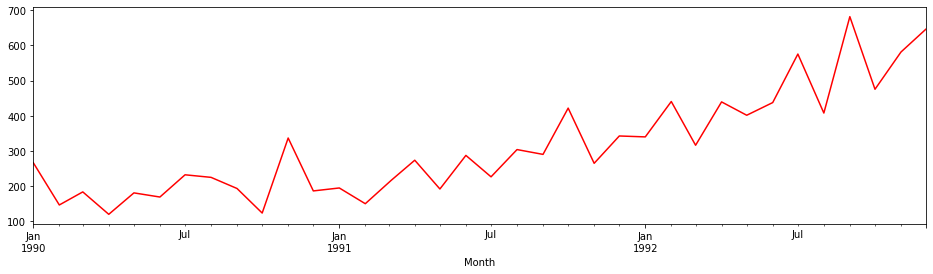

In [5]:
interpolated.plot(figsize=(16,4),color="r")
plt.show()

**Downsampling Data**

In [6]:
resample = series.resample('Q').mean() #Quarterly Basis
pd.DataFrame(resample)

,Sales
Month,
1990-03-31,198.333333
1990-06-30,156.033333
1990-09-30,216.366667
1990-12-31,215.100000
1991-03-31,184.633333
1991-06-30,250.566667
1991-09-30,273.166667
1991-12-31,342.800000
1992-03-31,365.333333


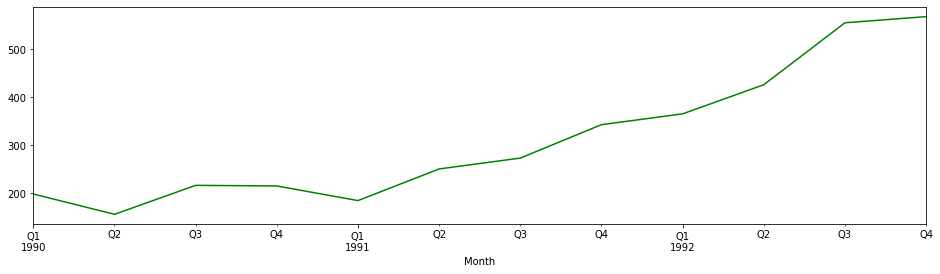

In [7]:
resample.plot(figsize=(16,4),color="g")
plt.show()

**Daily Vs Quaterly**

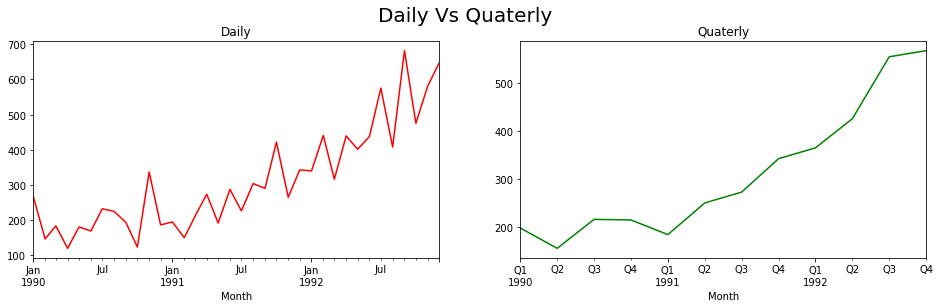

In [8]:
fig = plt.figure(figsize=(16,4))
plt.suptitle('Daily Vs Quaterly', size=20, y=1) 
plt.subplot(1,2,1) 
interpolated.plot(color="r")
plt.title('Daily')

plt.subplot(1,2,2)
resample.plot(color="g")
plt.title('Quaterly')
plt.show();

# Tranformations

In [9]:
series = pd.read_csv('/airline-passengers.csv', header=0, index_col=0, parse_dates=True)
series.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


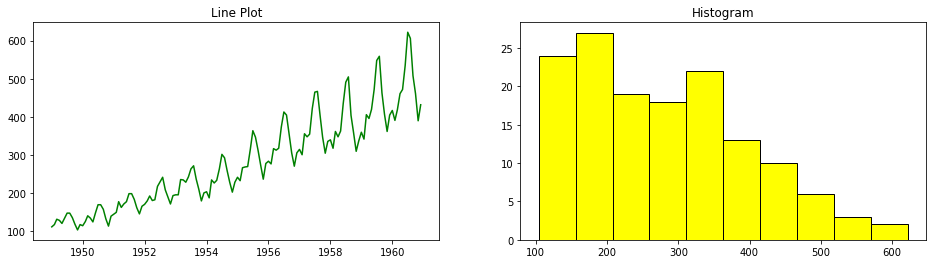

In [10]:
#Time Sereis
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(series,color="green")
plt.title('Line Plot')

plt.subplot(1,2,2)
plt.hist(series,facecolor ="yellow",edgecolor ="black")
plt.title('Histogram')
plt.show()

**Square Root Transform**

In [11]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

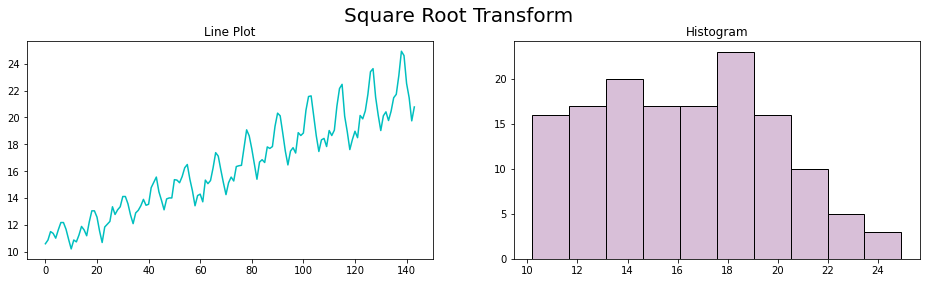

In [12]:
fig = plt.figure(figsize=(16,4))
plt.suptitle('Square Root Transform', size=20, y=1) 
plt.subplot(1,2,1)
plt.plot(dataframe['passengers'],color="c")
plt.title('Line Plot')

plt.subplot(1,2,2)
plt.hist(dataframe['passengers'],facecolor ="thistle",edgecolor ="black")
plt.title('Histogram')
plt.show()

**Log Transform**

In [13]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

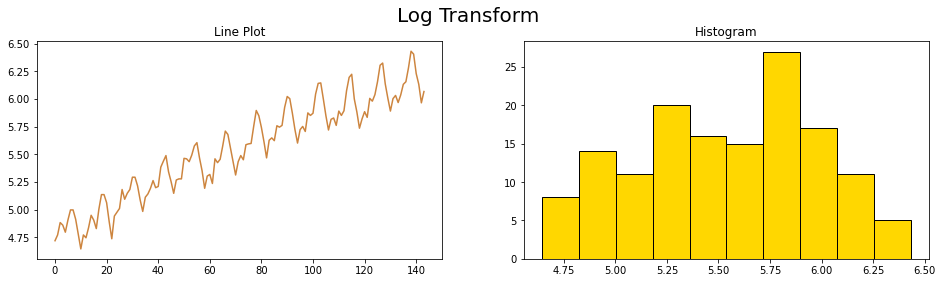

In [14]:
fig = plt.figure(figsize=(16,4))
plt.suptitle('Log Transform', size=20, y=1) 
plt.subplot(1,2,1)
plt.plot(dataframe['passengers'],color='peru')
plt.title('Line Plot')

plt.subplot(1,2,2)
plt.hist(dataframe['passengers'],facecolor ="gold",edgecolor ="black")
plt.title('Histogram')
plt.show()

**Summary**

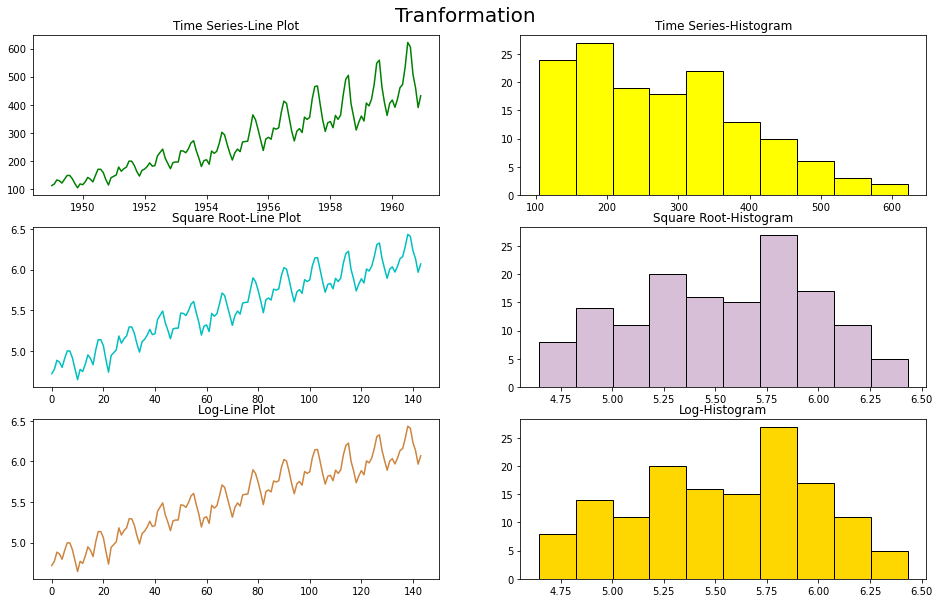

In [15]:
fig = plt.figure(figsize=(16,10))
plt.suptitle('Tranformation', size=20, y=.92) 

plt.subplot(3,2,1)
plt.plot(series,color="green")
plt.title('Time Series-Line Plot')
plt.subplot(3,2,2)
plt.hist(series,facecolor ="yellow",edgecolor ="black")
plt.title('Time Series-Histogram')
plt.subplot(3,2,3)
plt.plot(dataframe['passengers'],color="c")
plt.title('Square Root-Line Plot')
plt.subplot(3,2,4)
plt.hist(dataframe['passengers'],facecolor ="thistle",edgecolor ="black")
plt.title('Square Root-Histogram')
plt.subplot(3,2,5)
plt.plot(dataframe['passengers'],color='peru')
plt.title('Log-Line Plot')
plt.subplot(3,2,6)
plt.hist(dataframe['passengers'],facecolor ="gold",edgecolor ="black")
plt.title('Log-Histogram')
plt.show();